<a href="https://colab.research.google.com/github/fOrest1337/EDA-ON-DS-SALARIES/blob/main/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82_%D0%B4%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
cols=['length','width','size','conc','concl','asym','m3long']
data=pd.read_csv('/content/gdrive/MyDrive/ds_salaries.csv')

Mounted at /content/gdrive


In [ ]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
data.describe()#описательные статистики

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


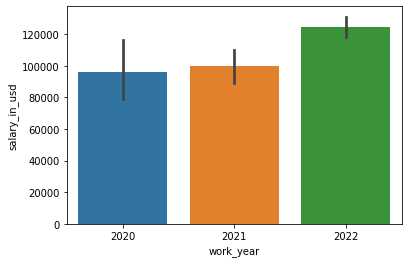

In [ ]:
sns.barplot(data=data,x='work_year',y='salary_in_usd')#рапсределение зарплаты по годам.Заметен существенный рост в 2022 году

In [ ]:
data.loc[:,['job_title','remote_ratio']]

,job_title,remote_ratio
0,Data Scientist,0
1,Machine Learning Scientist,0
2,Big Data Engineer,50
3,Product Data Analyst,0
4,Machine Learning Engineer,50
...,...,...
602,Data Engineer,100
603,Data Engineer,100
604,Data Analyst,0
605,Data Analyst,100


In [ ]:
data['job_title'].value_counts()#количество работников разных специальностей и уровней

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


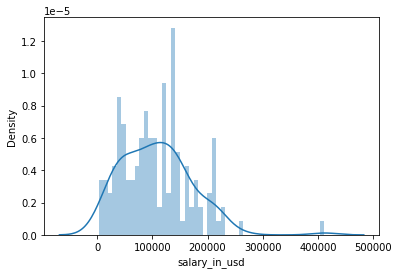

In [ ]:
a=data[data['job_title']=='Data Scientist']['salary_in_usd']
sns.distplot(a,bins=50,hist=True,kde=True) #распределение зарплаты дата саентистов

In [ ]:
zpposkily=data.groupby('experience_level').salary_in_usd.mean()#средняя зарплата в зависимости от проф. уровня работника
print(zpposkily)

experience_level
EN     61643.318182
EX    199392.038462
MI     87996.056338
SE    138617.292857
Name: salary_in_usd, dtype: float64


In [ ]:
zpposkily1=data.groupby('experience_level').salary_in_usd.std()# стандартное отклонение зарплат от уровня работника
print(zpposkily1)

experience_level
EN     44395.541126
EX    117071.255697
MI     63901.057478
SE     57691.978337
Name: salary_in_usd, dtype: float64


In [ ]:
zarplata_po_razmerycomp_srednee=data.groupby('company_size').salary_in_usd.mean()
zarplata_po_razmerycomp_razbros=data.groupby('company_size').salary_in_usd.std()

print('среднее зп по размерам компаний',zarplata_po_razmerycomp_srednee)
print('стандартное отклонение зарплаты по размерам компаний',zarplata_po_razmerycomp_razbros)

среднее зп по размерам компаний company_size
L    119242.994949
M    116905.466258
S     77632.674699
Name: salary_in_usd, dtype: float64
стандартное отклонение зарплаты по размерам компаний company_size
L    86156.740692
M    59287.694614
S    63461.706497
Name: salary_in_usd, dtype: float64


In [ ]:
a=data[data['job_title']=='Machine Learning Engineer']['salary_in_usd']
a.var()

3996594728.878048

In [ ]:
a.std()

63218.626439349726

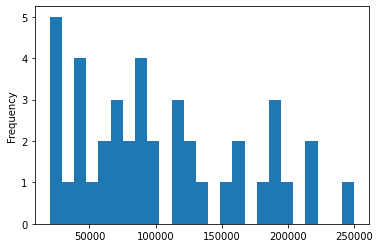

In [ ]:
data[data['job_title']=='Machine Learning Engineer']['salary_in_usd'].plot.hist(bins=25)#распределение зп у МL инженеров

In [ ]:
import scipy.stats as stats

In [ ]:
stats.normaltest(a)#по результатм данного теста отклоняется гипотеза о нормальности распределения зп мл инженеров

NormaltestResult(statistic=27.42534615598192, pvalue=1.1083112716609872e-06)

In [ ]:
data[data['job_title']=='Data Scientist']['salary_in_usd'].var()

4110456319.351915

In [ ]:
data[data['job_title']=='Data Scientist']['salary_in_usd'].std()

64112.84051851014

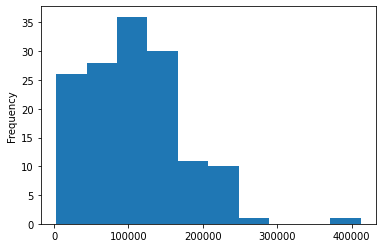

In [ ]:
data[data['job_title']=='Data Scientist']['salary_in_usd'].plot.hist(50)

In [ ]:
import scipy.stats as stats 

In [ ]:
import plotly.express as px

In [ ]:
fig=px.box(data,x='company_size',y='salary_in_usd')
fig.show() #распределение зп в зависимости от размера компании.самая выскокая зарплатная медиана в средних компаний,однако 75 перцентиль выше у крупных компаний.Также самые высокие зп были зафиксированы в крупных компаниях

In [ ]:
cop=data['company_size'].value_counts()
fig=px.pie(names=cop.index,values=cop.values)
fig.show()#количество компаний разных размеров.Больше всего средних компаний

In [ ]:
strana=data['company_location'].value_counts().head(20)
fig=px.pie(names=strana.index,values=strana.values)
fig.show()#распределение компаний по странам.Больше всего айти компаний распологается в сша 

In [ ]:
#проверим какие нибудь распредеделения среди зарплат дс сферы на нормальность.

In [ ]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
bdizpshka=data[data['job_title']=='Big Data Engineer']['salary_in_usd']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



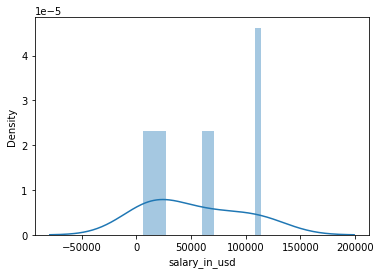

In [ ]:
sns.distplot(bdizpshka,bins=20,kde=True)

In [ ]:
bditestikshapiro=stats.shapiro(zpshka)
bditestikshapiro #не можем отклонить гипотезу о нормальности распределения зарплат инженеров биг дат

ShapiroResult(statistic=0.8702005743980408, pvalue=0.151411771774292)

In [ ]:
#проведем тесты на равенство средних зарплат среди различных профессий .Используем тест стьюдента для выборок с неравными дисперсиями.

In [ ]:
stats.ttest_ind(bdizpshka,dezpshka)#

Ttest_indResult(statistic=-2.9284037585482063, pvalue=0.003987035492356758)

In [ ]:
stats.ttest_ind(dazpshka,dezpshka)

Ttest_indResult(statistic=-2.9127895901188388, pvalue=0.003939787257907956)

In [ ]:
stats.ttest_ind(dazpshka,zpshkads)

Ttest_indResult(statistic=-2.089537080208217, pvalue=0.0377215709893397)

In [ ]:
stats.ttest_ind(zpshkads,dezpshka)

Ttest_indResult(statistic=-0.6153481784901966, pvalue=0.5388374242106854)

In [ ]:
stats.ttest_ind(zpshkads,bdizpshka)

Ttest_indResult(statistic=2.4452261443583825, pvalue=0.01564175492704834)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



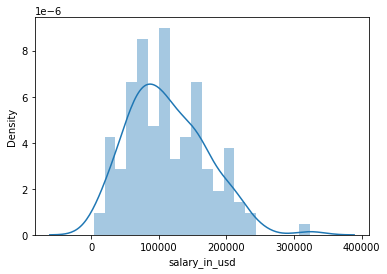

In [ ]:
dezpshka=data[data['job_title']=='Data Engineer']['salary_in_usd']
sns.distplot(dezpshka,bins=20,kde=True)

In [ ]:
stats.normaltest(dezpshka)

NormaltestResult(statistic=8.196824443560466, pvalue=0.01659901003605426)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



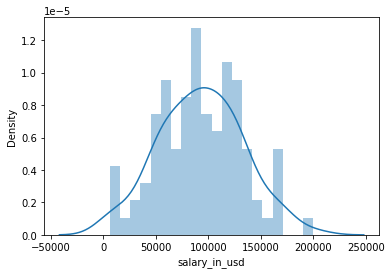

In [ ]:
dazpshka=data[data['job_title']=='Data Analyst']['salary_in_usd']
stats.normaltest(dazpshka)
sns.distplot(dazpshka,bins=20,kde=True)

In [ ]:
zpshkads=data[data['job_title']=='Data Scientist']['salary_in_usd']

In [ ]:
dszptestshapiro=stats.shapiro(zpshkads)
dszptestshapiro

ShapiroResult(statistic=0.948443591594696, pvalue=3.7642807001248e-05)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



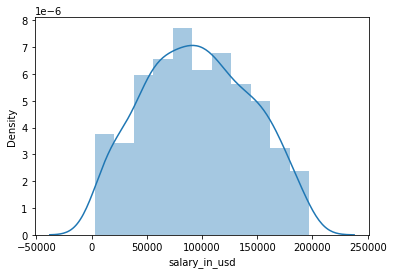

In [ ]:
sns.distplot(zpobsh,hist=True)